# Flowers Classificaiton Model

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Iris

In [21]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = iris.target
df['species'] = df['species'].map({0: 'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Preprocessing

In [22]:
x = df.drop('species', axis=1)
y = df['species']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Split the Data Into Training and Testing

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the KNN Classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Make Predictions

In [25]:
y_pred = knn.predict(x_test)

# Conduct Accuracy and Report

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 100.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Evaluating the Model

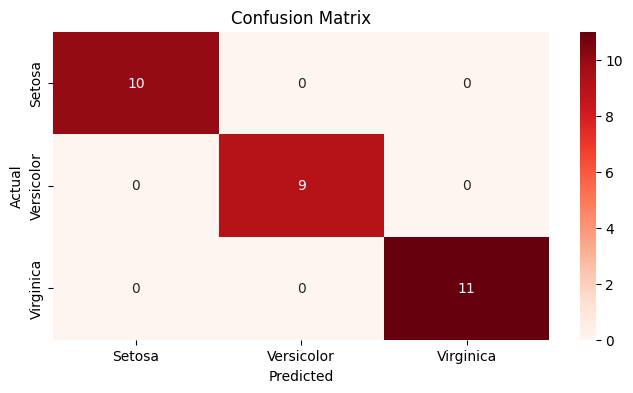

In [27]:
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Model Prediction

In [28]:
columns = ['sepal length (cm)', 'sepal width (cm)',	'petal length (cm)', 'petal width (cm)']

test_data = pd.DataFrame([[5.1,3.5,1.4,0.2]], columns=columns)

prediction = knn.predict(test_data)

print(f"Predicted Flower: {prediction[0].capitalize()}")

Predicted Flower: Iris-setosa
